# TP3: Feature Extraction in Computer Vision

## Activité 1 – Extraction de points clés avec SIFT


### 1.1 Détection des points clés et affichage des descripteurs SIFT

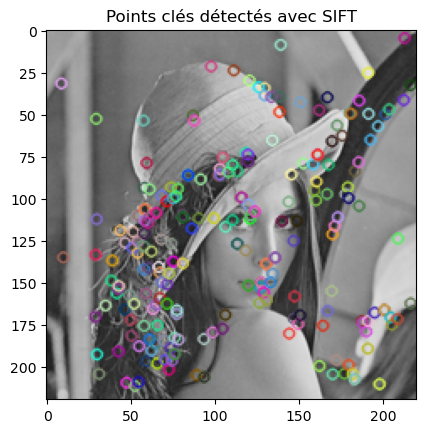

Nombre de points détectés : 238


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Chargement de l'image
img = np.array(Image.open('images/fatchat.png').convert('L'))

# Création de l'objet SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)

# Affichage
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_sift, cmap='gray')
plt.title("Points clés détectés avec SIFT")
plt.show()

print(f"Nombre de points détectés : {len(keypoints)}")


### 1.2 Influence des transformations sur les points SIFT

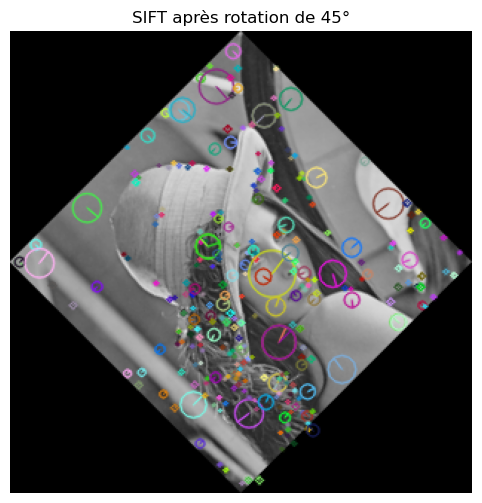

Nombre de points clés après rotation : 305


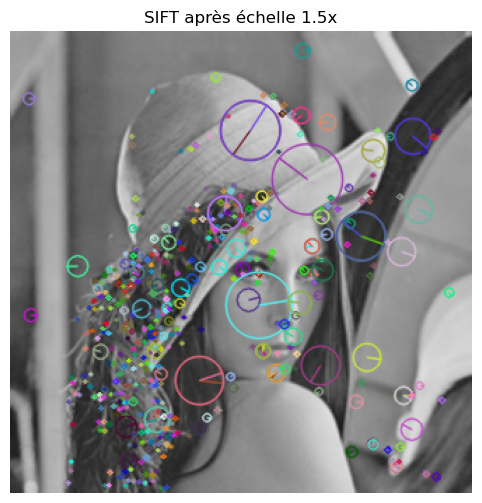

Nombre de points clés après échelle : 519


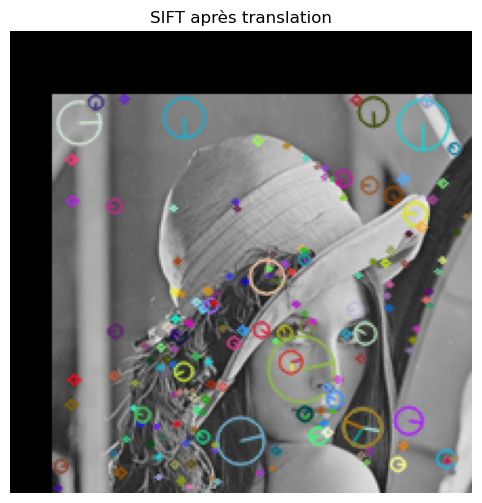

Nombre de points clés après translation : 200


In [ ]:
from skimage.transform import rotate, rescale, AffineTransform, warp
# Fonction pour détecter et afficher les points SIFT
def detect_and_show_sift(img, title):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_sift, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    return keypoints, descriptors

# Rotation de 45 degrés
img_rotated = rotate(img, angle=45, resize=True)
keypoints_rot, descriptors_rot = detect_and_show_sift((img_rotated * 255).astype(np.uint8), 'SIFT après rotation de 45°')
print(f'Nombre de points clés après rotation : {len(keypoints_rot)}')

# Changement d'échelle (1.5x)
img_scaled = rescale(img, scale=1.5, anti_aliasing=True)
keypoints_scale, descriptors_scale = detect_and_show_sift((img_scaled * 255).astype(np.uint8), 'SIFT après échelle 1.5x')
print(f'Nombre de points clés après échelle : {len(keypoints_scale)}')

# Translation (20 pixels en x, 30 pixels en y)
transform = AffineTransform(translation=(20, 30))
img_translated = warp(img, transform.inverse, preserve_range=True)
keypoints_trans, descriptors_trans = detect_and_show_sift(img_translated.astype(np.uint8), 'SIFT après translation')
print(f'Nombre de points clés après translation : {len(keypoints_trans)}')


**Observations**:

- **Rotation**: Les points clés restent détectés, mais leur nombre et positions varient légèrement en raison de la modification de l'orientation.
- **Échelle**: Une augmentation de l'échelle peut augmenter le nombre de points clés, car plus de détails deviennent détectables.
- **Translation**: Les points clés sont globalement préservés, avec un décalage correspondant à la translation.

### 1.3 Correspondance des points clés entre deux images

In [3]:
# Convert cv2.KeyPoint to numpy array of (x, y) coordinates
def keypoints_to_np(keypoints):
    return np.array([kp.pt for kp in keypoints])


C:\Users\dell\AppData\Local\Temp\ipykernel_2612\992276291.py:22: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax, img, (img_rotated * 255).astype(np.uint8), keypoints_to_np(keypoints), keypoints_to_np(keypoints_rot), matches)


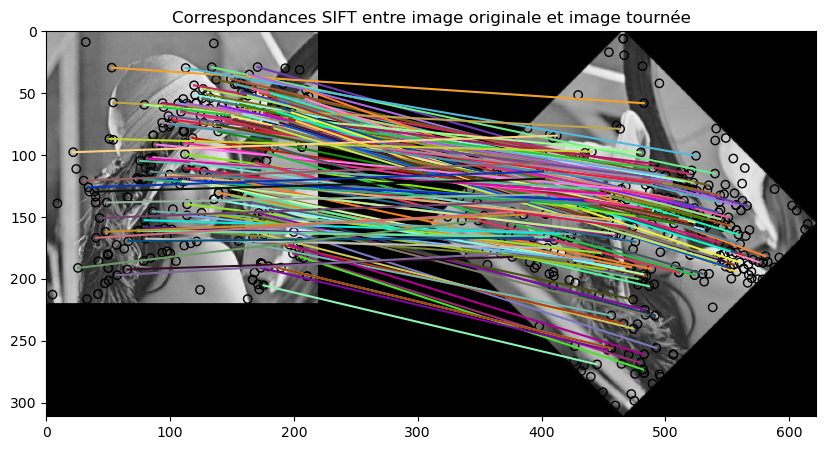

Metric: euclidean, Max Ratio: 0.5, Cross Check: True, Matches: 126
Metric: euclidean, Max Ratio: 0.5, Cross Check: False, Matches: 127
Metric: euclidean, Max Ratio: 0.6, Cross Check: True, Matches: 129
Metric: euclidean, Max Ratio: 0.6, Cross Check: False, Matches: 131
Metric: euclidean, Max Ratio: 0.8, Cross Check: True, Matches: 135
Metric: euclidean, Max Ratio: 0.8, Cross Check: False, Matches: 141
Metric: hamming, Max Ratio: 0.5, Cross Check: True, Matches: 0
Metric: hamming, Max Ratio: 0.5, Cross Check: False, Matches: 0
Metric: hamming, Max Ratio: 0.6, Cross Check: True, Matches: 1
Metric: hamming, Max Ratio: 0.6, Cross Check: False, Matches: 1
Metric: hamming, Max Ratio: 0.8, Cross Check: True, Matches: 45
Metric: hamming, Max Ratio: 0.8, Cross Check: False, Matches: 45


In [ ]:
from skimage.feature import match_descriptors, plot_matches
# Comparaison entre l'image originale et l'image tournée
matches = match_descriptors(descriptors, descriptors_rot, metric='euclidean', max_ratio=0.6, cross_check=True)

# Affichage des correspondances
fig, ax = plt.subplots(figsize=(10, 5))
plot_matches(ax, img, (img_rotated * 255).astype(np.uint8), keypoints_to_np(keypoints), keypoints_to_np(keypoints_rot), matches)
plt.title('Correspondances SIFT entre image originale et image tournée')
plt.show()

# Test avec différents paramètres
metrics = ['euclidean', 'hamming']
max_ratios = [0.5, 0.6, 0.8]
cross_checks = [True, False]

for metric in metrics:
    for max_ratio in max_ratios:
        for cross_check in cross_checks:
            matches = match_descriptors(descriptors, descriptors_rot, metric=metric, max_ratio=max_ratio, cross_check=cross_check)
            print(f'Metric: {metric}, Max Ratio: {max_ratio}, Cross Check: {cross_check}, Matches: {len(matches)}')

## Activité 2: Descripteur HOG (Histogram of Oriented Gradients)

### 2.1 Calcul et visualisation du descripteur HOG

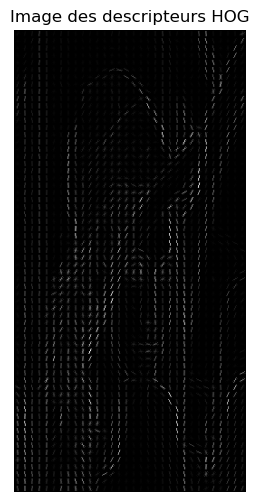

Taille du descripteur HOG : (70308,)


In [9]:
from skimage.feature import hog
from skimage.transform import resize
from skimage import exposure

# Chargement de l'image
img_color = np.array(Image.open('images/fatchat.png'))
resized_img = resize(img_color, (128*4, 64*4))

# Calcul du descripteur HOG
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=2)

# Amélioration de la visibilité
hog_image = exposure.rescale_intensity(hog_image, out_range=(0, 255))

# Affichage
plt.figure(figsize=(8, 6))
plt.imshow(hog_image, cmap='gray')
plt.title('Image des descripteurs HOG')
plt.axis('off')
plt.show()
print(f'Taille du descripteur HOG : {fd.shape}')


### 2.2 Analyse des paramètres du HOG

In [10]:
# Test avec orientations=16
fd_16, hog_image_16 = hog(resized_img, orientations=16, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=2)
print(f'Taille du descripteur HOG avec 16 orientations : {fd_16.shape}')

# Test avec différentes valeurs de pixels_per_cell et cells_per_block
pixels_per_cells = [(8, 8), (16, 16)]
cells_per_blocks = [(2, 2), (3, 3)]

for ppc in pixels_per_cells:
    for cpb in cells_per_blocks:
        fd, _ = hog(resized_img, orientations=9, pixels_per_cell=ppc, cells_per_block=cpb, visualize=True, channel_axis=2)
        print(f'pixels_per_cell={ppc}, cells_per_block={cpb}, Taille descripteur : {fd.shape}')

Taille du descripteur HOG avec 16 orientations : (124992,)
pixels_per_cell=(8, 8), cells_per_block=(2, 2), Taille descripteur : (70308,)
pixels_per_cell=(8, 8), cells_per_block=(3, 3), Taille descripteur : (150660,)
pixels_per_cell=(16, 16), cells_per_block=(2, 2), Taille descripteur : (16740,)
pixels_per_cell=(16, 16), cells_per_block=(3, 3), Taille descripteur : (34020,)


**Analyse**:
1. **fd** : Vecteur des caractéristiques HOG (histogramme concaténé).
2. **hog_image** : Visualisation des gradients orientés.
3. **channel_axis** : Spécifie l'axe des canaux de couleur (RGB).
4. **orientations=16** : Augmente la taille du descripteur en capturant plus de directions de gradients.
5. **pixels_per_cell et cells_per_block** : Une augmentation réduit la taille du descripteur mais perd en détails.

## Activité 3: Descripteur LBP (Local Binary Patterns)


### 3.1 Extraction du descripteur LBP et affichage

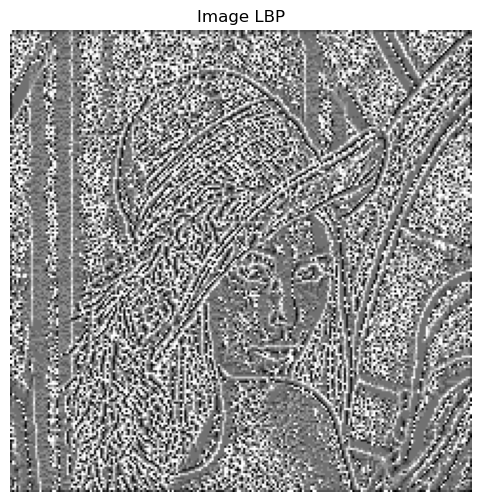

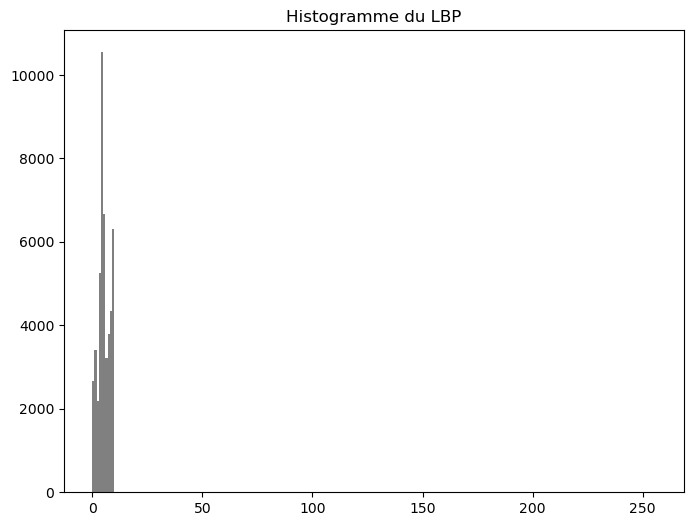

In [13]:
from skimage.feature import local_binary_pattern

# Chargement de l'image en niveaux de gris
img = np.array(Image.open('images/fatchat.png').convert('L'))
# Paramètres LBP
P = 8
R = 1

# Calcul LBP
lbp = local_binary_pattern(img, P, R, method='uniform')

# Affichage de l'image LBP
plt.figure(figsize=(8, 6))
plt.imshow(lbp, cmap='gray')
plt.title('Image LBP')
plt.axis('off')
plt.show()

# Affichage de l'histogramme
plt.figure(figsize=(8, 6))
plt.hist(lbp.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogramme du LBP')
plt.show()


### 3.2 Segmentation en blocs et calcul des descripteurs

In [17]:
from skimage.util import view_as_blocks
# Division en blocs de 16x16
block_shape = (16, 16)

# Padding de l'image pour qu'elle soit divisible par block_shape
pad_height = (block_shape[0] - img.shape[0] % block_shape[0]) % block_shape[0]
pad_width = (block_shape[1] - img.shape[1] % block_shape[1]) % block_shape[1]
padded_img = np.pad(img, ((0, pad_height), (0, pad_width)), mode='constant', constant_values=0)

# Découpage en blocs
blocks = view_as_blocks(padded_img, block_shape)

# Calcul des descripteurs LBP pour chaque bloc
descriptors = []
for i in range(blocks.shape[0]):
    for j in range(blocks.shape[1]):
        block = blocks[i, j]
        lbp_block = local_binary_pattern(block, P, R, method='uniform')
        hist, _ = np.histogram(lbp_block, bins=256, range=(0, 256))
        descriptors.append(hist)

# Concaténation des descripteurs
final_descriptor = np.concatenate(descriptors)
print(f'Taille du descripteur final : {final_descriptor.shape}')


Taille du descripteur final : (50176,)


**Comparaison SIFT, HOG, LBP**:
- **SIFT** : Détecte des points clés invariants aux transformations, idéal pour la correspondance d'images.
- **HOG** : Capture les structures via les gradients, adapté à la détection d'objets (ex. personnes).
- **LBP** : Analyse les textures, efficace pour la reconnaissance faciale.

**Détection de visages** : LBP est recommandé pour sa robustesse aux variations d'éclairage et sa capacité à capturer les textures faciales.

**Robustesse aux transformations** : SIFT est le plus robuste grâce à son invariance aux rotations, échelles et translations.